In [2]:
#import ipyrad.analysis as ipa   ## ipyrad analysis toolkit
import ipyparallel as ipp       ## parallel processing
import toyplot                  ## plotting library 
import ipyrad.analysis as ipa 
import sklearn
import pandas as pd

In [ ]:
## Start Ipcluster
## -------------------------------------------------------------------------------------------
## run the below line in terminal, or with '!' in jupyter notebooks
## !ipcluster start -n 10 --cluster-id="structure3" --daemonize
## this will stop the ipcluster
## !ipcluster stop --cluster-id="ipyrad" 

## link the cluster with ipyclient
ipyclient = ipp.Client(cluster_id="structure")

In [3]:
## get parallel client
ipyclient = ipp.Client()
print("Connected to {} cores".format(len(ipyclient)))

Connected to 0 cores


In [15]:
## the structure formatted file
strfile = "./mergedThuja_minsamp4.snps.hdf5"

## an optional mapfile, to sample unlinked SNPs
mapfile = "./mergedThuja_minsamp4.seqs.hdf5"

## the directory where outfiles should be written
workdir = "./thuja-struct-outfiles/"

In [16]:
## create a Structure object
struct = ipa.structure(name="thuja-test",minmap=mapfile,
                       data=strfile)
                   

NameError: name 'ipa' is not defined

In [13]:
## the structure formatted file
strfile = "./ThujaMinsamp25.snps.hdf5"

## an optional mapfile, to sample unlinked SNPs
mapfile = "./ThujaMinsamp25.seqs.hdf5"

## the directory where outfiles should be written
workdir = "./thuja-struct-outfiles/"

In [14]:
## the structure formatted file
strfile = "./PopStructure/ThujaMinsamp25.snps.hdf5"

## an optional mapfile, to sample unlinked SNPs
mapfile = "./PopStructure/ThujaMinsamp25.seqs.hdf5"

## the directory where outfiles should be written
workdir = "./thuja-struct-outfiles/"

In [16]:
## create a Structure object
#struct = ipa.structure(name="thuja-25",minmap=mapfile,
#                       data=strfile, workdir="./structureTest")
                   

In [17]:
## the structure formatted file
strfile = "./PopStructure/ThujaMinsamp10.snps.hdf5"

## an optional mapfile, to sample unlinked SNPs
mapfile = "./PopStructure/ThujaMinsamp10.seqs.hdf5"


In [5]:
## the structure formatted file
strfile = "./ThujaMinsamp10.snps.hdf5"

## an optional mapfile, to sample unlinked SNPs
mapfile = "./ThujaMinsamp10.seqs.hdf5"

In [6]:
## create a Structure object
struct = ipa.structure(name="thuja-10",minmap=mapfile,
                       data=strfile, workdir="./AllThujaStrRunsk1-10_5reps")
                   

50 previous results loaded for run [thuja-10]
Samples: 137
Sites before filtering: 95429
Filtered (indels): 2377
Filtered (bi-allel): 4067
Filtered (mincov): 0
Filtered (minmap): 0
Filtered (combined): 6220
Sites after filtering: 89209
Sites containing missing values: 89209 (100.00%)
Missing values in SNP matrix: 10395438 (85.06%)


In [20]:
## set mainparams for object
struct.mainparams.burnin = 50000
struct.mainparams.numreps = 500000

In [21]:
## see all mainparams
print(struct.mainparams)

## see or set extraparams
print(struct.extraparams)

burnin             50000               
extracols          0                   
label              1                   
locdata            0                   
mapdistances       0                   
markernames        0                   
markovphase        0                   
missing            -9                  
notambiguous       -999                
numreps            500000              
onerowperind       0                   
phased             0                   
phaseinfo          0                   
phenotype          0                   
ploidy             2                   
popdata            0                   
popflag            0                   
recessivealleles   0                   

admburnin           500                 
alpha               1.0                 
alphamax            10.0                
alphapriora         1.0                 
alphapriorb         2.0                 
alphapropsd         0.025               
ancestdist          0            

In [ ]:
## wrote small script to run these without notebook needing to be open

In [ ]:
## running this across 20 cores on crick; screen structThuja2
struct.run( kpop=1, nreps=5, ipyclient=ipyclient)

Parallel connection | crick.ibest.uidaho.edu: 20 cores
[                    ]   0% 0:11:26 | running 5 structure jobs 

In [ ]:
## these are runnign on crick across 10 cores (?) and on structureThuja screen

kvalues = [2]

## submit batches of 10 replicate jobs for each value of K 
for kpop in kvalues:
    struct.run(
        kpop=kpop, 
        nreps=2, 
        seed=12345,
        ipyclient=ipyclient,
        )

Parallel connection | crick.ibest.uidaho.edu: 37 cores
[                    ]   0% 0:10:48 | running 5 structure jobs 

In [ ]:
## running this across 20 cores on crick; screen structThuja2
struct.run( kpop=3, nreps=5, ipyclient=ipyclient)

Parallel connection | crick.ibest.uidaho.edu: 20 cores
[                    ]   0% 0:06:02 | running 5 structure jobs 

In [7]:
##make sure result files are there
struct.result_files

['/mnt/lfs2/ruff6699/Thujaplicata_AllDataAnalysis/PopStructure/AllThujaStrRunsk1-10_5reps/thuja-10-K-1-rep-0_f',
 '/mnt/lfs2/ruff6699/Thujaplicata_AllDataAnalysis/PopStructure/AllThujaStrRunsk1-10_5reps/thuja-10-K-1-rep-1_f',
 '/mnt/lfs2/ruff6699/Thujaplicata_AllDataAnalysis/PopStructure/AllThujaStrRunsk1-10_5reps/thuja-10-K-1-rep-2_f',
 '/mnt/lfs2/ruff6699/Thujaplicata_AllDataAnalysis/PopStructure/AllThujaStrRunsk1-10_5reps/thuja-10-K-1-rep-3_f',
 '/mnt/lfs2/ruff6699/Thujaplicata_AllDataAnalysis/PopStructure/AllThujaStrRunsk1-10_5reps/thuja-10-K-1-rep-4_f',
 '/mnt/lfs2/ruff6699/Thujaplicata_AllDataAnalysis/PopStructure/AllThujaStrRunsk1-10_5reps/thuja-10-K-10-rep-0_f',
 '/mnt/lfs2/ruff6699/Thujaplicata_AllDataAnalysis/PopStructure/AllThujaStrRunsk1-10_5reps/thuja-10-K-10-rep-1_f',
 '/mnt/lfs2/ruff6699/Thujaplicata_AllDataAnalysis/PopStructure/AllThujaStrRunsk1-10_5reps/thuja-10-K-10-rep-2_f',
 '/mnt/lfs2/ruff6699/Thujaplicata_AllDataAnalysis/PopStructure/AllThujaStrRunsk1-10_5reps/thu

In [8]:
table_K1 = struct.get_clumpp_table(1)
table_K2 = struct.get_clumpp_table(2)
table_K3 = struct.get_clumpp_table(3)
table_K4 = struct.get_clumpp_table(4)
table_K5 = struct.get_clumpp_table(5)
table_K6 = struct.get_clumpp_table(6)
table_K7 = struct.get_clumpp_table(7)
table_K8 = struct.get_clumpp_table(8)
table_K9 = struct.get_clumpp_table(9)
table_K10 = struct.get_clumpp_table(10)

Nothing to permute or plot for kpop=1, but these results can be used for Evanno.
[K2] 5/5 results permuted across replicates (max_var=0).
[K3] 5/5 results permuted across replicates (max_var=0).
[K4] 5/5 results permuted across replicates (max_var=0).
[K5] 5/5 results permuted across replicates (max_var=0).
[K6] 5/5 results permuted across replicates (max_var=0).
[K7] 5/5 results permuted across replicates (max_var=0).
[K8] 5/5 results permuted across replicates (max_var=0).
[K9] 5/5 results permuted across replicates (max_var=0).
[K10] 5/5 results permuted across replicates (max_var=0).


In [10]:
def fancy_plot(table, out="outfile"):
    import toyplot
    ## further styling of plot with css 
    style = {"stroke":toyplot.color.near_black, 
         "stroke-width": 2}

    ## build barplot
    canvas = toyplot.Canvas(width=1200, height=800)
    axes = canvas.cartesian(bounds=("5%", "95%", "5%", "45%"))
    axes.bars(table, style=style, )

    ## add names to x-axis
    ticklabels = [i for i in table.index.tolist()]
    axes.x.ticks.locator = toyplot.locator.Explicit(labels=ticklabels)
    axes.x.ticks.labels.angle = -60
    axes.x.ticks.show = True
    axes.x.ticks.labels.offset = 10
    axes.x.ticks.labels.style = {"font-size": "8px"}
    axes.x.spine.style = style
    axes.y.show = False
    
    import toyplot.svg
    import toyplot.pdf
    outSVG = out + ".svg"
    outPDF = out + ".pdf"
    toyplot.svg.render(canvas, outSVG)
    toyplot.pdf.render(canvas, outPDF)

    ## show in notebook
    return canvas

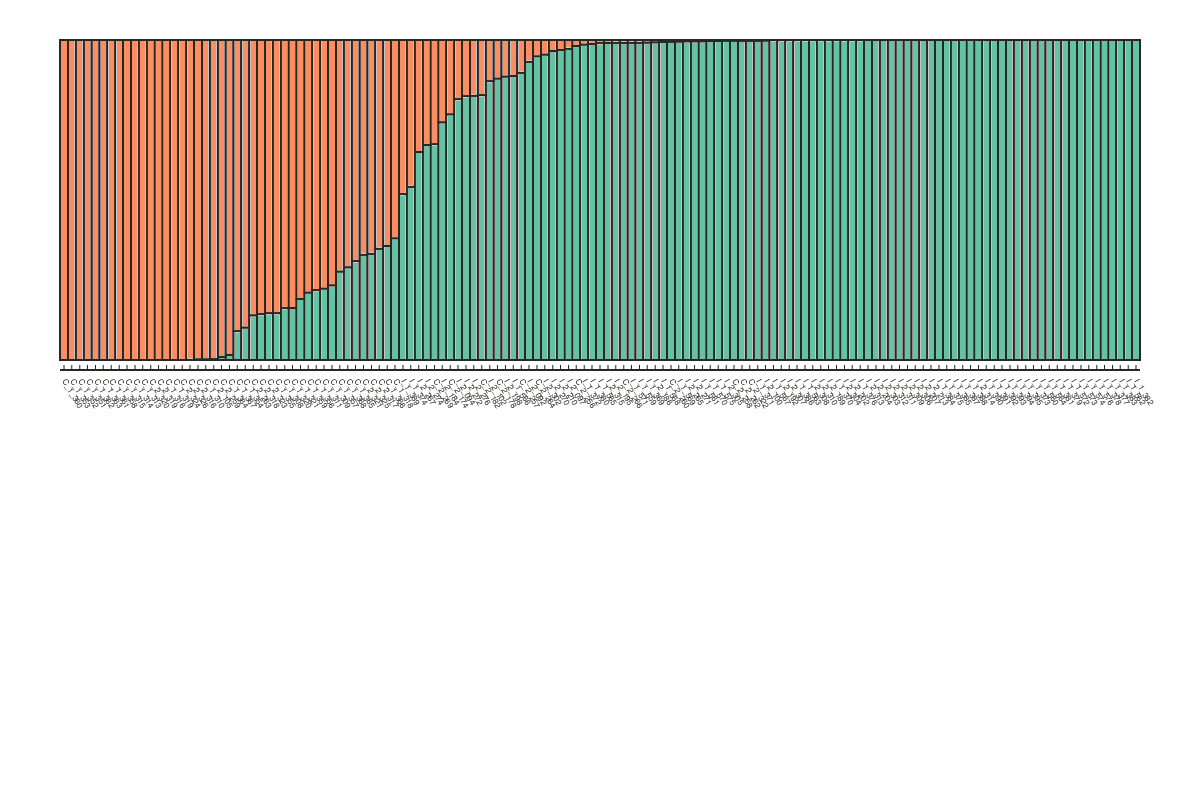

In [20]:
## plot K=2
table_K2.columns = ['pop1', 'pop2']
toPLot = table_K2.sort_values(by='pop1')
toPLot
fancy_plot(toPLot, out="ThujaK2")

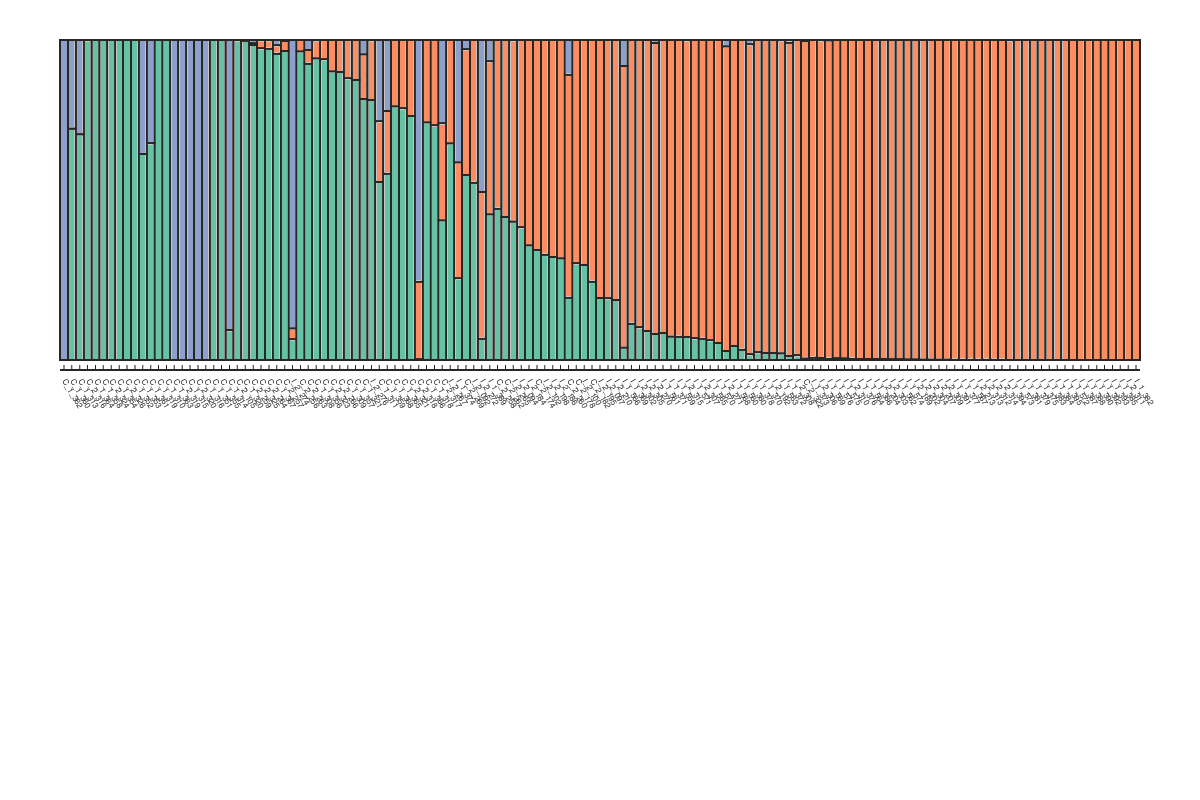

In [21]:
## plot K=3
table_K3.columns = ['pop1', 'pop2', 'pop3']
toPLot = table_K3.sort_values(by='pop3')
toPLot =toPLot.sort_values(by='pop2')
fancy_plot(toPLot, out="ThujaK3")

In [ ]:
## k = 2
fancy_plot(All_tables[1])

In [ ]:
## k = 3
fancy_plot(All_tables[2])

In [ ]:
##was an attempt to get this going on my own but it is driving me crazy so just going to submit the jobs and be patient

## ran this first to sample a random SNP from the full vcf
#python3 vcf_parser.py --random-snp -vcf ThujaMinsamp10Full.vcf 

## this give help doc of pgd spider
#java -Xmx1024m -Xms512m -jar /mnt/ceph/ruff6699/PGDSpider_2.1.1.5/PGDSpider2-cli.jar -inputfile ThujaMinsamp10FullRandSNP.vcf -inputformat VCF -outputfile ThujaRandSNP.str -outputformat STRUCTURE